# Variable Engineering

## Load Liberies

In [14]:
import numpy as np #
import pandas as pd #
from subprocess import check_output #
import matplotlib.pyplot as plt #
import seaborn as sns #

In [81]:
airRes = pd.read_csv('./input/air_reserve.csv')
airStore = pd.read_csv('./input/air_store_info.csv')
airVisit = pd.read_csv('./input/air_visit_data.csv')

relID = pd.read_csv('./input/store_id_relation.csv')

hpgRes = pd.read_csv('./input/hpg_reserve.csv')
hpgStore = pd.read_csv('./input/hpg_store_info.csv')

dates = pd.read_csv('./input/date_info.csv')

### Help function 

In [80]:
STARS ='\n***********************************************************\n'
def printData(tableFunc) :
    print("The Shape of the Table is: ",tableFunc.shape)
    print(STARS)
    print('The name of the columns are: {}'.format(tableFunc.columns))
    


def displayData(tableFunc, lines = 3):
    display(tableFunc.head(lines))
    display(tableFunc.describe())

### AIR

In [64]:
displayData(airRes)

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6

reserve_visitors
count      92378.000000
mean           4.481749
std            4.919669
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          100.000000

In [65]:
displayData(airStore)

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852

latitude   longitude
count  829.000000  829.000000
mean    35.647042  137.415311
std      2.084659    3.650971
min     33.211967  130.195555
25%     34.695124  135.341564
50%     35.658068  139.685474
75%     35.694003  139.751599
max     44.020632  144.273398

### HPG

In [66]:
displayData(hpgRes)

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f  2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5  2016-01-01 16:00:00  2016-01-01 14:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 2

reserve_visitors
count      2.000320e+06
mean       5.073785e+00
std        5.416172e+00
min        1.000000e+00
25%        2.000000e+00
50%        3.000000e+00
75%        6.000000e+00
max        1.000000e+02

In [67]:
displayData(hpgStore)

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221

latitude    longitude
count  4690.000000  4690.000000
mean     35.810261   137.675816
std       2.138755     3.197233
min      33.311645   130.339313
25%      34.692109   135.498859
50%      35.659214   139.495733
75%      35.703381   139.737998
max      43.774846   143.714585

### Store ID relation

In [68]:
displayData(relID)

air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9

air_store_id          hpg_store_id
count                    150                   150
unique                   150                   150
top     air_1033310359ceeac1  hpg_2d4200d0ebdb4946
freq                       1                     1

### 1.1 Merge <code>air_reserve</code> and  <code> air_store_info </code>

In [41]:
air = pd.merge(airRes,airStore,on='air_store_id')

In [69]:
displayData(air)
printData(air)


air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
2  air_877f79706adbfb06  2016-01-02 18:00:00  2016-01-01 16:00:00   

   reserve_visitors air_genre_name                 air_area_name   latitude  \
0                 1  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
1                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
2                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   

    longitude  
0  139.751599  
1  139.751599  
2  139.751599

reserve_visitors      latitude     longitude
count      92378.000000  92378.000000  92378.000000
mean           4.481749     36.296511    137.258264
std            4.919669      2.994006      3.802518
min            1.000000     33.211967    130.348436
25%            2.000000     34.681261    134.841177
50%            3.000000     35.641463    139.036327
75%            5.000000     35.694003    139.770825
max          100.000000     44.020632    144.273398

The Shape of the Table is:  (92378, 8)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude'],
      dtype='object')


### 1.2 Merge <code>hpg_reserve</code> and  <code>hpg_store_info </code>

In [59]:
hpg = pd.merge(hpgRes,hpgStore,on='hpg_store_id')

In [70]:
displayData(hpg)
printData(hpg)

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
1  hpg_dac72789163a3f47  2016-01-02 12:00:00  2016-01-01 20:00:00   
2  hpg_dac72789163a3f47  2016-01-03 19:00:00  2016-01-02 15:00:00   

   reserve_visitors hpg_genre_name            hpg_area_name   latitude  \
0                 3         French  Hyōgo-ken Kōbe-shi None  34.692109   
1                 2         French  Hyōgo-ken Kōbe-shi None  34.692109   
2                 2         French  Hyōgo-ken Kōbe-shi None  34.692109   

    longitude  
0  135.191698  
1  135.191698  
2  135.191698

reserve_visitors       latitude      longitude
count     871308.000000  871308.000000  871308.000000
mean           5.335364      35.859339     137.492275
std            5.890690       2.266437       3.302581
min            1.000000      33.311645     130.339313
25%            2.000000      34.692109     135.495215
50%            3.000000      35.648231     139.373870
75%            6.000000      35.704527     139.737998
max          100.000000      43.774846     143.714585

The Shape of the Table is:  (871308, 8)

***********************************************************

The name of the columns are: Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude'],
      dtype='object')


### 2.1 Merge with new table <code>air</code> and <code>store_id_relation</code>

In [54]:
airRel = pd.merge(air,relID,how='left',on='air_store_id')

In [72]:
displayData(airRel)
printData(airRel)

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
2  air_877f79706adbfb06  2016-01-02 18:00:00  2016-01-01 16:00:00   

   reserve_visitors air_genre_name                 air_area_name   latitude  \
0                 1  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
1                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
2                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   

    longitude hpg_store_id  
0  139.751599          NaN  
1  139.751599          NaN  
2  139.751599          NaN

reserve_visitors      latitude     longitude
count      92378.000000  92378.000000  92378.000000
mean           4.481749     36.296511    137.258264
std            4.919669      2.994006      3.802518
min            1.000000     33.211967    130.348436
25%            2.000000     34.681261    134.841177
50%            3.000000     35.641463    139.036327
75%            5.000000     35.694003    139.770825
max          100.000000     44.020632    144.273398

The Shape of the Table is:  (92378, 9)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'hpg_store_id'],
      dtype='object')


### 2.2 Merge with new table <code>hpg</code> and <code>store_id_relation</code>

In [50]:
hpgRel = pd.merge(hpg,relID,how='left',on='hpg_store_id')

In [73]:
displayData(hpgRel)
printData(hpgRel)

hpg_store_id       visit_datetime     reserve_datetime  \
0  hpg_dac72789163a3f47  2016-01-01 13:00:00  2016-01-01 06:00:00   
1  hpg_dac72789163a3f47  2016-01-02 12:00:00  2016-01-01 20:00:00   
2  hpg_dac72789163a3f47  2016-01-03 19:00:00  2016-01-02 15:00:00   

   reserve_visitors hpg_genre_name            hpg_area_name   latitude  \
0                 3         French  Hyōgo-ken Kōbe-shi None  34.692109   
1                 2         French  Hyōgo-ken Kōbe-shi None  34.692109   
2                 2         French  Hyōgo-ken Kōbe-shi None  34.692109   

    longitude air_store_id  
0  135.191698          NaN  
1  135.191698          NaN  
2  135.191698          NaN

reserve_visitors       latitude      longitude
count     871308.000000  871308.000000  871308.000000
mean           5.335364      35.859339     137.492275
std            5.890690       2.266437       3.302581
min            1.000000      33.311645     130.339313
25%            2.000000      34.692109     135.495215
50%            3.000000      35.648231     139.373870
75%            6.000000      35.704527     139.737998
max          100.000000      43.774846     143.714585

The Shape of the Table is:  (871308, 9)

***********************************************************

The name of the columns are: Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude', 'air_store_id'],
      dtype='object')


### 3 Merge with new tables <code>airRel</code> and <code>hpgRel</code>

In [74]:
print("there are ",len(air)," restaurants with AIR and ",len(hpg)," with HPG.",len(relID),' have both.')

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.


In [75]:
full = pd.merge(airRel,hpgRel,how='outer')
displayData(full)
printData(full)

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
2  air_877f79706adbfb06  2016-01-02 18:00:00  2016-01-01 16:00:00   

   reserve_visitors air_genre_name                 air_area_name   latitude  \
0                 1  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
1                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
2                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   

    longitude hpg_store_id hpg_genre_name hpg_area_name  
0  139.751599          NaN            NaN           NaN  
1  139.751599          NaN            NaN           NaN  
2  139.751599          NaN            NaN           NaN

reserve_visitors       latitude      longitude
count     963686.000000  963686.000000  963686.000000
mean           5.253537      35.901246     137.469843
std            5.810087       2.349505       3.354441
min            1.000000      33.211967     130.339313
25%            2.000000      34.692109     135.483426
50%            3.000000      35.646745     139.373870
75%            6.000000      35.704527     139.737998
max          100.000000      44.020632     144.273398

The Shape of the Table is:  (963686, 11)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'hpg_store_id', 'hpg_genre_name', 'hpg_area_name'],
      dtype='object')


### 1.1 KNN Clustering by region in Japan

Apparently Japan's terittory is divided in 8 regions which are not official administrative units, but have been traditionally used as the regional division of Japan in a number of contexts [https://en.wikipedia.org/wiki/List_of_regions_of_Japan ]

From north to south, the traditional regions are:
* **Hokkaidō** (the island of Hokkaidō and nearby islands, population: 5,507,456, largest city: Sapporo)
* **Tōhoku** region (northern Honshū, population: 9,335,088, largest city: Sendai)
* **Kantō** region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
* **Chūbu region** (central Honshū, including Mt. Fuji, population: 21,714,995, largest city: Nagoya), sometimes divided into:
   * Hokuriku region (northwestern Chūbu, largest city: Kanazawa)
   * Kōshin'etsu region (northeastern Chūbu, largest city: Niigata)
  * Tōkai region (southern Chūbu, largest city: Nagoya)
* **Kansai or Kinki** region (west-central Honshū, including the old capital, Kyoto, population: 22,755,030, largest city: Osaka)
* **Chūgoku** region (western Honshū, population: 7,561,899, largest city: Hiroshima)
* **Shikoku** (island, population: 3,977,205, largest city: Matsuyama)
* **Kyūshū** (island, population: 14,596,977, largest city: Fukuoka) which includes:
  * Northern Kyushu: Fukuoka, Saga, Nagasaki and Ōita (largest city: Fukuoka)
  * Southern Kyushu: Kumamoto, Miyazaki and Kagoshima (largest city: Kagoshima)
  * Okinawa (largest city: Naha)

In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(full[['longitude','latitude']])
full['cluster'] = kmeans.predict(full[['longitude','latitude']])

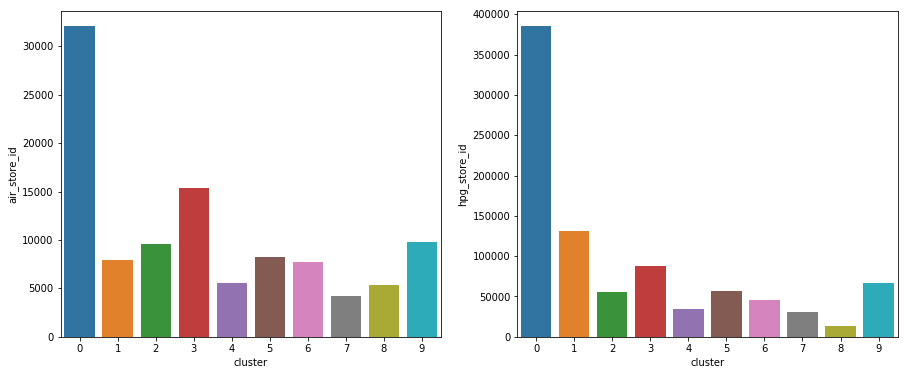

In [78]:
f,axa = plt.subplots(1,2,figsize=(15,6))
hist_clust = full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster,y=hist_clust.air_store_id,ax=axa[0])
sns.barplot(x=hist_clust.cluster,y=hist_clust.hpg_store_id,ax=axa[1])
plt.show()

Let's try to relate the identified groups with the biggest cities:

* Cluster 0 refers to Tokyo.
* Cluster 1 refers  to Osaka
* Cluster 2 refers to Sapporo
* Cluster 3 refers to Fukuoka
* Cluster 4 refers to Niigata
* Cluster 5 referst to Hiroshima
* Cluster 6 refers to Shizouku
* Cluster 7 refers to Sendai
* Cluster 9 refers to Kobe

## 1.2. Data distributed

C:\Users\gali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


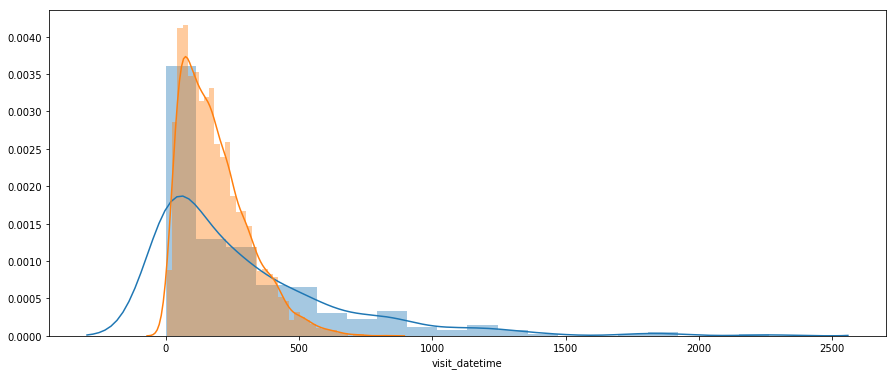

In [79]:
f,ax = plt.subplots(1,1,figsize=(15,6))
airhist = air.groupby(['air_store_id'],as_index=False).count()
sns.distplot(airhist.visit_datetime)
hpghist = hpg.groupby(['hpg_store_id'],as_index=False).count()
sns.distplot(hpghist.visit_datetime)
plt.show()

### Japanese Holidays

Let's check what are the Japanese holidays excluding Saturday and Sundays

I want to learn more about that so I will rely on this list https://www.officeholidays.com/countries/japan/index.php

* Jan 1st - **New Years day **;
* 2nd Monday of January - **Coming of Age day **: The day honors young Japanese who will reach the age of 20 at any point during the year. Twenty is the age of majority in Japan, and people who have reached this age gain the right to vote in elections as well as to drink;
* Feb 11th - **National Foundation day**:  a national holiday for Japanese people to remind themselves of the nation's founding and foster their love for the nation;
* March 20th or 21st- **Vernal Equinox day**: The day is intended to celebrate the love of nature and living things.In modern Japan, the day still maintains its older traditions as visiting family graves and holding family reunions is a common way of celebrating the equinox;
* April 29th - ** Showa day**: Showa Day honours the birthday of Emperor Hirohito, the reigning Emperor before, during, and after World War II (from 1926 - 1989);

continue...


In [83]:
displayData(dates,15)
#dates.head(15)

calendar_date day_of_week  holiday_flg
0     2016-01-01      Friday            1
1     2016-01-02    Saturday            1
2     2016-01-03      Sunday            1
3     2016-01-04      Monday            0
4     2016-01-05     Tuesday            0
5     2016-01-06   Wednesday            0
6     2016-01-07    Thursday            0
7     2016-01-08      Friday            0
8     2016-01-09    Saturday            0
9     2016-01-10      Sunday            0
10    2016-01-11      Monday            1
11    2016-01-12     Tuesday            0
12    2016-01-13   Wednesday            0
13    2016-01-14    Thursday            0
14    2016-01-15      Friday            0

holiday_flg
count   517.000000
mean      0.067698
std       0.251471
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [85]:
vdt = pd.to_datetime(full.visit_datetime)
rdt = pd.to_datetime(full.reserve_datetime)
full['vd']=vdt.dt.date
full['vt']=vdt.dt.time
full['rd']=rdt.dt.date
full['rt']=rdt.dt.time

dts = pd.to_datetime(dates.calendar_date)
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
dates['calendar_date'] = pd.to_datetime(dates['calendar_date']).dt.date
dates['dy'] = dts.dt.dayofyear
dates['dw'] = [days.index(dw) for dw in dates.day_of_week] # 
dates.tail(10)

calendar_date day_of_week  holiday_flg   dy  dw
507    2017-05-22      Monday            0  142   1
508    2017-05-23     Tuesday            0  143   2
509    2017-05-24   Wednesday            0  144   3
510    2017-05-25    Thursday            0  145   4
511    2017-05-26      Friday            0  146   5
512    2017-05-27    Saturday            0  147   6
513    2017-05-28      Sunday            0  148   0
514    2017-05-29      Monday            0  149   1
515    2017-05-30     Tuesday            0  150   2
516    2017-05-31   Wednesday            0  151   3

In [87]:
#dates['dy'].unique()
517 - 366

151

In [35]:
nf = pd.merge(full,dates[['calendar_date','holiday_flg']],how='left',left_on='vd',right_on='calendar_date')
nf = nf.rename(index = str, columns = {'holiday_flg':'visit_holiday'})
nf = nf.drop(['calendar_date'],axis=1)

nf = pd.merge(nf,dates[['calendar_date','holiday_flg']],how = 'left', left_on='rd',right_on='calendar_date')
nf = nf.rename(index = str, columns = {'holiday_flg':'reservation_holiday'})
nf = nf.drop(['calendar_date'],axis=1)

nf['vd'] = pd.to_datetime(nf['vd']).dt.dayofyear
nf['rd'] = pd.to_datetime(nf['rd']).dt.dayofyear
nf.head()

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
2  air_877f79706adbfb06  2016-01-02 18:00:00  2016-01-01 16:00:00   
3  air_877f79706adbfb06  2016-01-02 21:00:00  2016-01-01 16:00:00   
4  air_877f79706adbfb06  2016-01-08 21:00:00  2016-01-04 20:00:00   

   reserve_visitors air_genre_name                 air_area_name   latitude  \
0                 1  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
1                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
2                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
3                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   
4                 2  Japanese food  Tōkyō-to Minato-ku Shibakōen  35.658068   

    longitude hpg_store_id hpg_genre_name hpg_area_name  cluster  vd  \
0  139.751599          NaN            NaN           NaN        0   1   
1  139.751599          NaN            NaN           NaN        0   1   
2  139.751599          NaN            NaN           NaN        0   2   
3  139.751599          NaN            NaN           NaN        0   2   
4  139.751599          NaN            NaN           NaN        0   8   

         vt  rd        rt  visit_holiday  reservation_holiday  
0  19:00:00   1  16:00:00              1                    1  
1  20:00:00   1  16:00:00              1                    1  
2  18:00:00   1  16:00:00              1                    1  
3  21:00:00   1  16:00:00              1                    1  
4  21:00:00   4  20:00:00              0                    0

We can check how many days before the visit japenese people make the reservation.

In [36]:
deltatime = vdt - rdt
days = deltatime.dt.days

days.describe()

count    963686.000000
mean          6.909061
std          11.507296
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         393.000000
dtype: float64

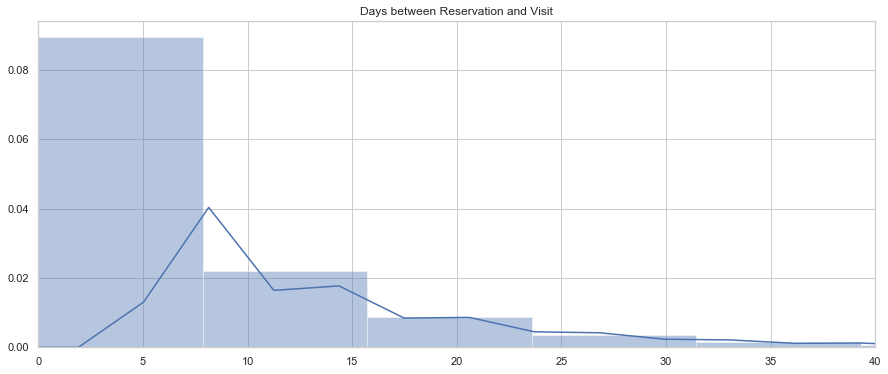

In [37]:
f,axa = plt.subplots(1,1,figsize=(15,6))
sns.distplot(days)
plt.xlim(0,40)
axa.set_title('Days between Reservation and Visit')
plt.show()

## Weather Data

In [40]:
wd = pd.read_csv('WeatherData.csv')
wd.head()

area_name calendar_date  precipitation  avg_temperature  \
0  fukuoka_dazaifu-kana_dasaif        1/1/16            0.0              5.7   
1  fukuoka_dazaifu-kana_dasaif        1/2/16            0.5             10.2   
2  fukuoka_dazaifu-kana_dasaif        1/3/16            0.0             11.2   
3  fukuoka_dazaifu-kana_dasaif        1/4/16            0.0              9.4   
4  fukuoka_dazaifu-kana_dasaif        1/5/16            1.5              8.8   

   total_snowfall  deepest_snowfall  hours_sunlight  avg_wind_speed  \
0             NaN               NaN             5.1             1.9   
1             NaN               NaN             1.3             2.2   
2             NaN               NaN             0.5             0.9   
3             NaN               NaN             4.2             1.8   
4             NaN               NaN             0.0             0.8   

   avg_vapor_pressure  avg_humidity  avg_sea_pressure  avg_local_pressure  \
0                 NaN           NaN               NaN                 NaN   
1                 NaN           NaN               NaN                 NaN   
2                 NaN           NaN               NaN                 NaN   
3                 NaN           NaN               NaN                 NaN   
4                 NaN           NaN               NaN                 NaN   

   solar_radiation  cloud_cover  high_temperature  low_temperature  
0              NaN          NaN              11.0              2.1  
1              NaN          NaN              15.3              6.1  
2              NaN          NaN              15.5              7.1  
3              NaN          NaN              16.1              5.9  
4              NaN          NaN              12.3              7.1

In [41]:
import re
def area2group(area):
    if re.match(r'tokyo.*',area) !=None:
        return 0
    if re.match(r'osaka.*',area) !=None:
        return 1
    if re.match(r'hokkaido.*',area) !=None:
        return 2    
    if re.match(r'fukuoka.*',area) !=None:
        return 3
    if re.match(r'niigata.*',area) !=None:
        return 4
    if re.match(r'hiroshima.*',area) !=None:
        return 5
    if re.match(r'shizuoka.*',area) !=None:
        return 6
    if re.match(r'miyagi.*',area) !=None:
        return 7
    else:
        return -1

warea = [area2group(area) for area in wd.area_name]
wd['cluster'] = warea
#re.match(r'fukuoka.*',wd.area_name[0])
#wd.area_name

In [42]:
wd['calendar_date'] = pd.to_datetime(wd.calendar_date).dt.date

In [43]:
vdates = pd.to_datetime(nf.visit_datetime).dt.date
nf['visit_date']=vdates

In [44]:
wdg = wd.groupby(['cluster','calendar_date'],as_index=False).mean()
wnf = pd.merge(wdg,nf,left_on=['cluster','calendar_date'],right_on=['cluster','visit_date'])

In [53]:
wnf.head(2)

cluster calendar_date  precipitation  avg_temperature  total_snowfall  \
0        0    2016-01-01            0.0         6.585714             NaN   
1        0    2016-01-01            0.0         6.585714             NaN   

   deepest_snowfall  hours_sunlight  avg_wind_speed  avg_vapor_pressure  \
0               NaN            9.15        2.328571                 4.5   
1               NaN            9.15        2.328571                 4.5   

   avg_humidity    ...     hpg_genre_name  hpg_area_name  vd        vt  rd  \
0          45.0    ...                NaN            NaN   1  19:00:00   1   
1          45.0    ...                NaN            NaN   1  20:00:00   1   

         rt visit_holiday reservation_holiday  visit_date  visitors  
0  16:00:00             1                   1  2016-01-01         3  
1  16:00:00             1                   1  2016-01-01         3  

[2 rows x 35 columns]

In [48]:
airvisit['visit_date'] = pd.to_datetime(airvisit['visit_date']).dt.date
wnf2 = pd.merge(wnf,airvisit,on=['air_store_id','visit_date'])

In [52]:
wnf2.head(2)

cluster calendar_date  precipitation  avg_temperature  total_snowfall  \
0        0    2016-01-01            0.0         6.585714             NaN   
1        0    2016-01-01            0.0         6.585714             NaN   

   deepest_snowfall  hours_sunlight  avg_wind_speed  avg_vapor_pressure  \
0               NaN            9.15        2.328571                 4.5   
1               NaN            9.15        2.328571                 4.5   

   avg_humidity     ...      hpg_area_name  vd        vt  rd        rt  \
0          45.0     ...                NaN   1  19:00:00   1  16:00:00   
1          45.0     ...                NaN   1  20:00:00   1  16:00:00   

   visit_holiday reservation_holiday  visit_date visitors_x  visitors_y  
0              1                   1  2016-01-01          3           3  
1              1                   1  2016-01-01          3           3  

[2 rows x 36 columns]

In [50]:
wnf.shape

(84007, 35)

In [54]:
airvisit.head()

air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6

In [51]:
wnf.dtypes

cluster                  int64
calendar_date           object
precipitation          float64
avg_temperature        float64
total_snowfall         float64
deepest_snowfall       float64
hours_sunlight         float64
avg_wind_speed         float64
avg_vapor_pressure     float64
avg_humidity           float64
avg_sea_pressure       float64
avg_local_pressure     float64
solar_radiation        float64
cloud_cover            float64
high_temperature       float64
low_temperature        float64
air_store_id            object
visit_datetime          object
reserve_datetime        object
reserve_visitors         int64
air_genre_name          object
air_area_name           object
latitude               float64
longitude              float64
hpg_store_id            object
hpg_genre_name          object
hpg_area_name           object
vd                       int64
vt                      object
rd                       int64
rt                      object
visit_holiday            int64
reservat

In [61]:
#wnf['air_genre_name'] = wnf['air_genre_name'].astype('category')
#wnf['hpg_genre_name'] = wnf['hpg_genre_name'].astype('category')
#wnf['air_area_name'] = wnf['air_area_name'].astype('category')
#wnf['hpg_area_name'] = wnf['hpg_area_name'].astype('category')

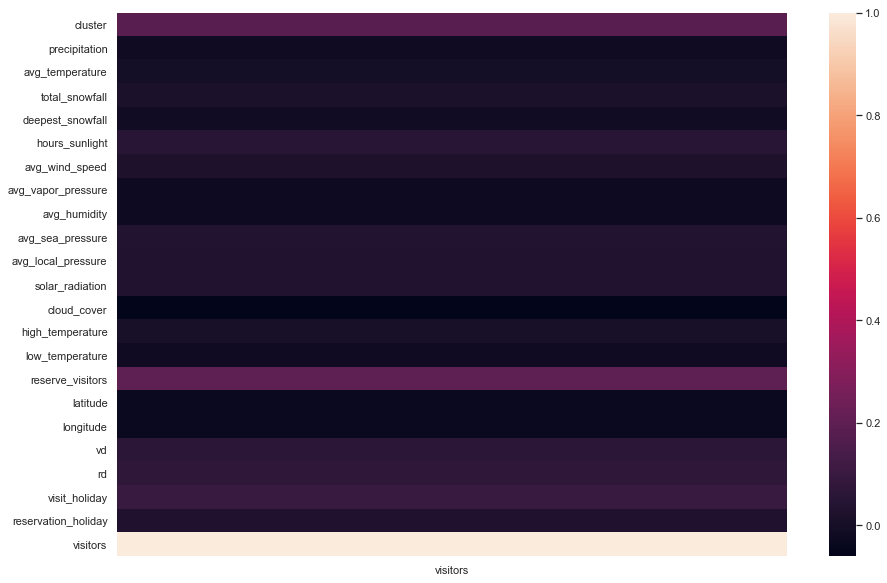

In [62]:
f,axa = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(wnf.corr()[['visitors']])

C:\Users\sergey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\sergey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


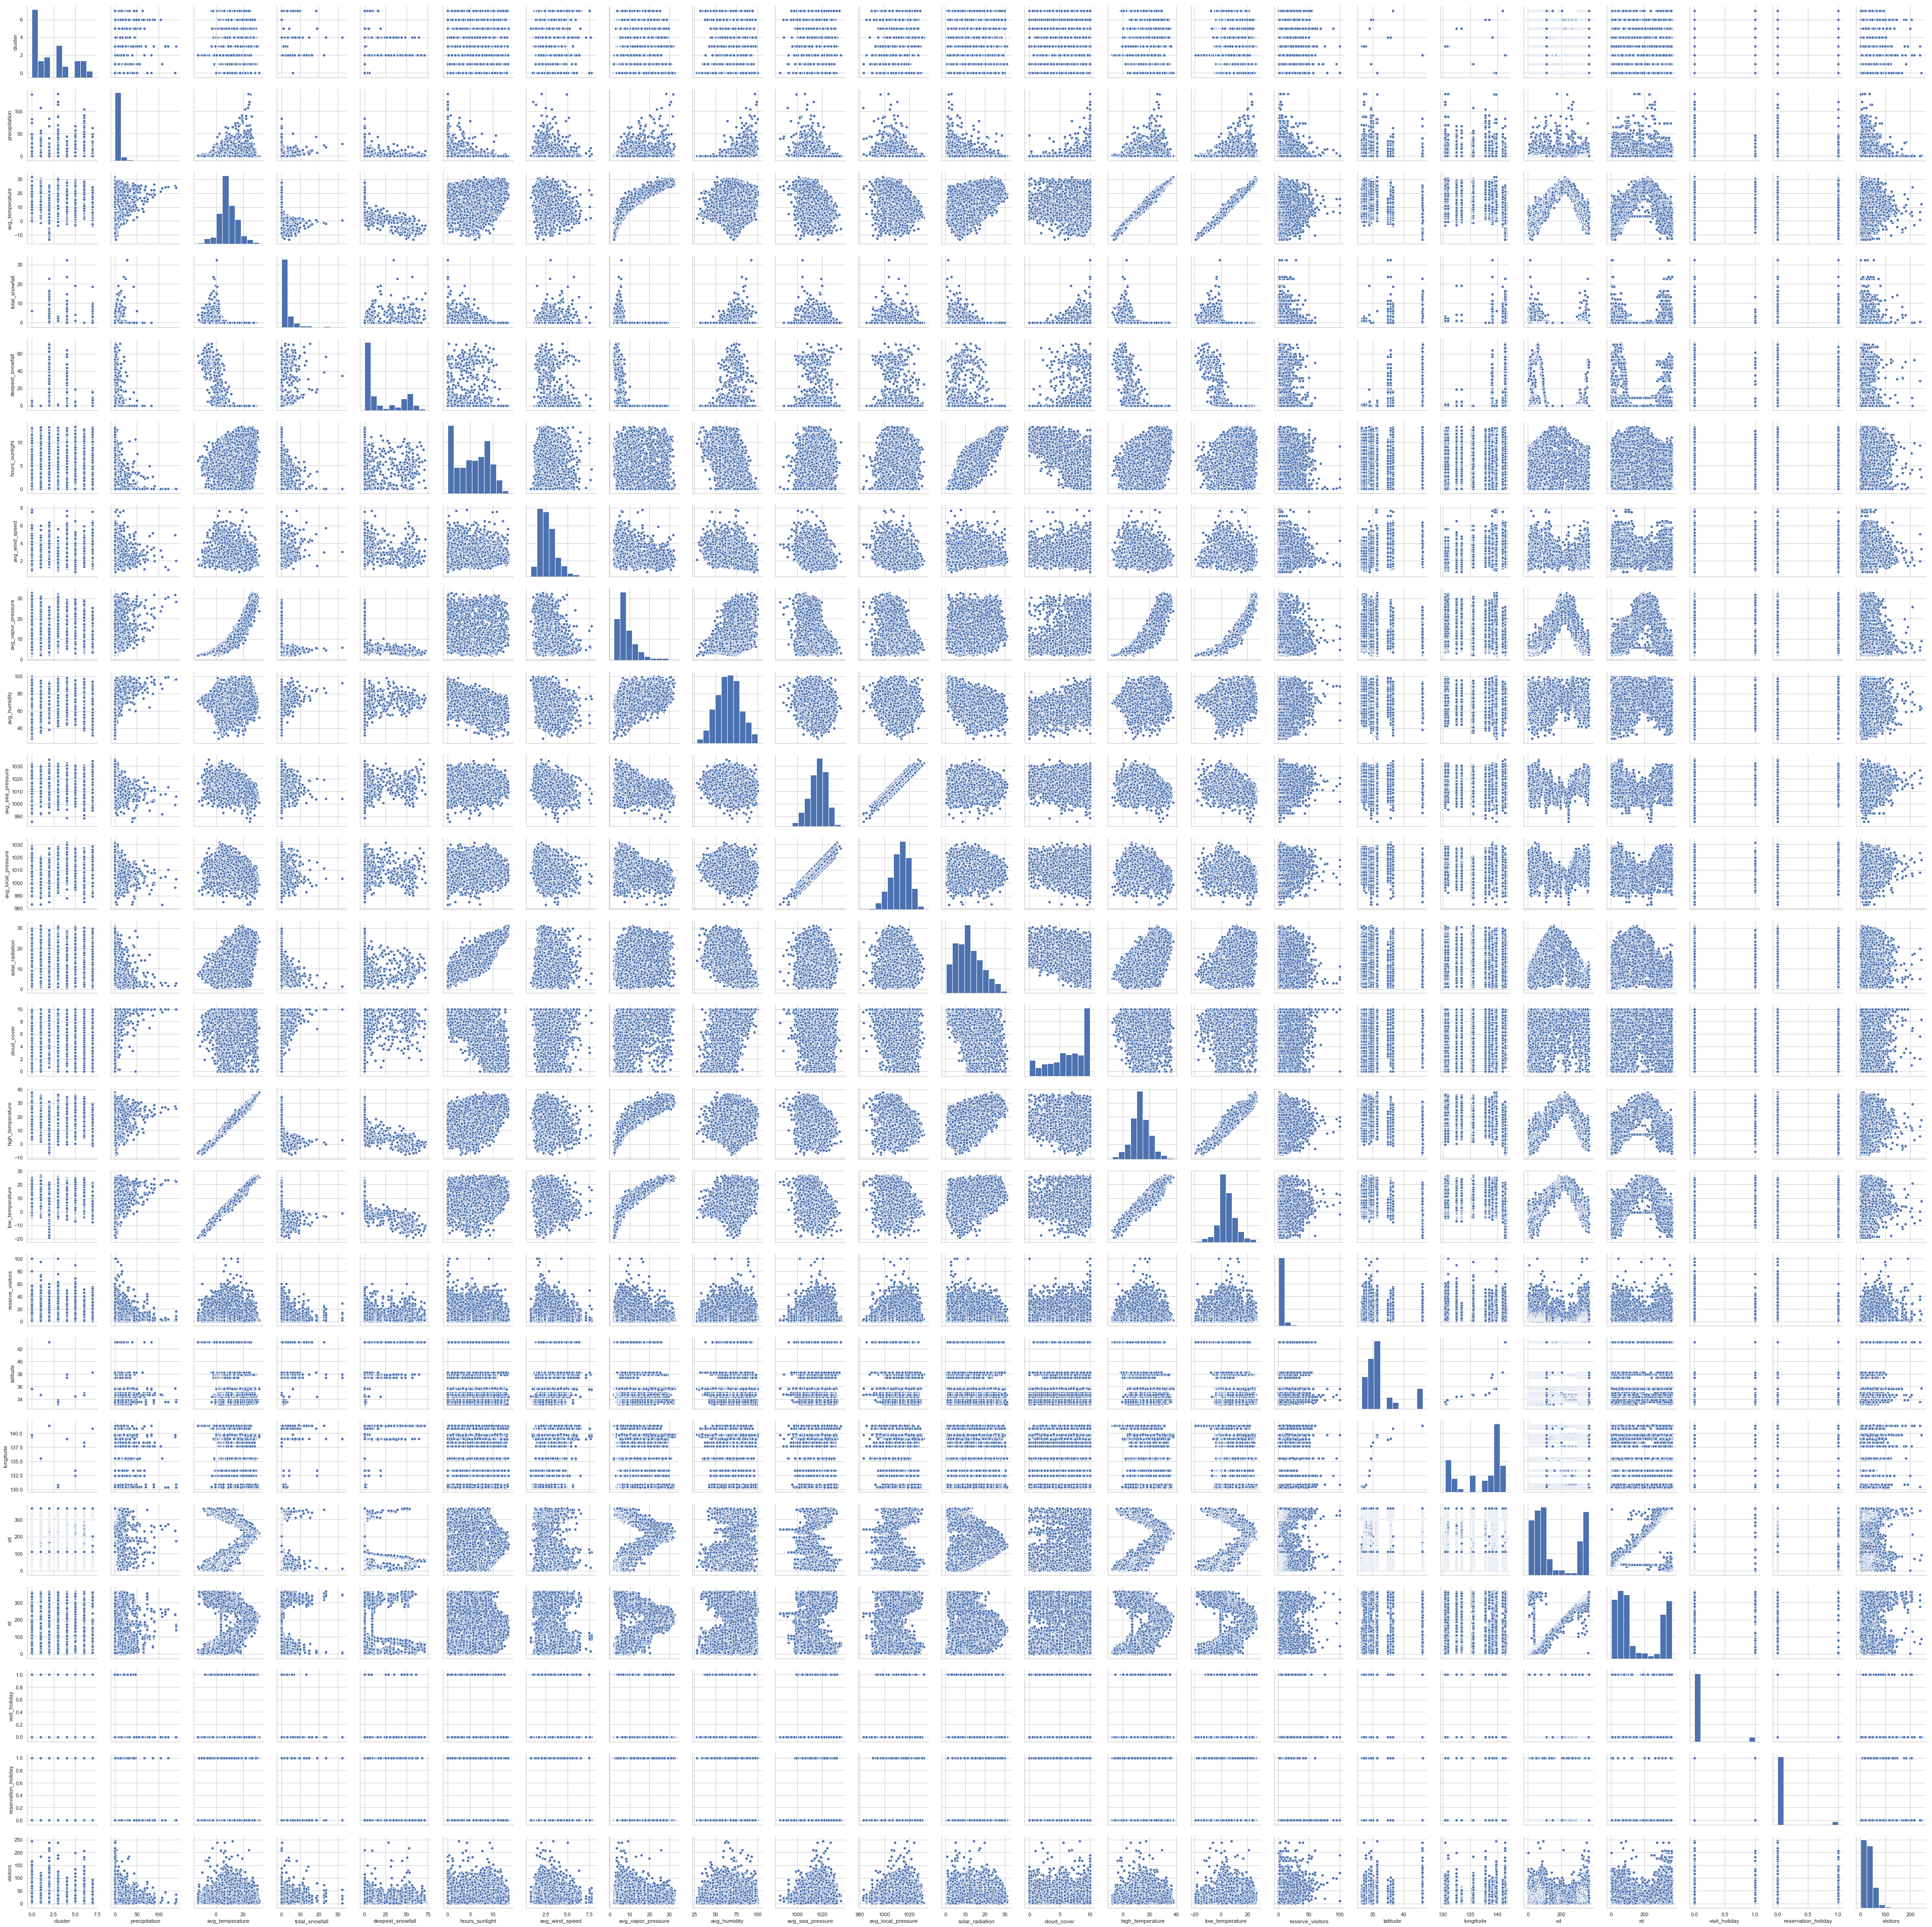

In [64]:
sns.pairplot(wnf)

In [65]:
from importlib import reload
import pyMechkar as mechkar
reload(mechkar)

<module 'pyMechkar' from 'C:\\Users\\sergey\\Documents\\Recruit Restaurant Visitor_2\\pyMechkar.py'>

In [68]:
x=wnf.columns.tolist()
tab1 = mechkar.pyMechkar().Table1(x=x,y="visitors",data=wnf,excel=True,excel_file="Table1_iris.xlsx")

Factorizing... please wait
[**********************************
['The variable calendar_date is not well defined. This data type is not allowed in Table1... avoided', 'The variable air_store_id is not well defined. This data type is not allowed in Table1... avoided', 'The variable visit_datetime is not well defined. This data type is not allowed in Table1... avoided', 'The variable reserve_datetime is not well defined. This data type is not allowed in Table1... avoided', 'The variable hpg_store_id is not well defined. This data type is not allowed in Table1... avoided', 'The variable vt is not well defined. This data type is not allowed in Table1... avoided', 'The variable rt is not well defined. This data type is not allowed in Table1... avoided', 'The variable visit_date is not well defined. This data type is not allowed in Table1... avoided']


TypeError: data type "category" not understood